In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = '../Data/Watoto Fund.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Watoto Fund,8.426930e+09,15378315.70,547.9748,547.9748,542.4951,2022-12-30
1,Watoto Fund,8.411487e+09,15359492.50,547.6410,547.6410,542.1646,2022-12-29
2,Watoto Fund,8.401340e+09,15344420.53,547.5176,547.5176,542.0424,2022-12-28
3,Watoto Fund,8.407602e+09,15359370.72,547.3924,547.3924,541.9184,2022-12-27
4,Watoto Fund,8.368495e+09,15301682.75,546.9003,546.9003,541.4313,2022-12-23


In [4]:
# Assuming you already have a DataFrame called 'df'
data['Date Valued'] = pd.to_datetime(data['Date Valued'])

In [5]:
df=data[['Scheme Name','Net Asset Value','Outstanding Number of Units','Nav Per Unit','Sale Price per Unit','Repurchase Price/Unit','Date Valued']]
df.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Watoto Fund,8.426930e+09,15378315.70,547.9748,547.9748,542.4951,2022-12-30
1,Watoto Fund,8.411487e+09,15359492.50,547.6410,547.6410,542.1646,2022-12-29
2,Watoto Fund,8.401340e+09,15344420.53,547.5176,547.5176,542.0424,2022-12-28
3,Watoto Fund,8.407602e+09,15359370.72,547.3924,547.3924,541.9184,2022-12-27
4,Watoto Fund,8.368495e+09,15301682.75,546.9003,546.9003,541.4313,2022-12-23


In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Net Asset Value,1656.0,3856473376.289771,3041243699.37,3248924832.9975,3441743784.04,4029948694.8675,18311116848.380001,1110999234.910253
Outstanding Number of Units,1656.0,10350221.546781,8994049.57,9205942.375,9755612.96,11652849.72,117883446.1,2954158.407963
Nav Per Unit,1656.0,374.242835,155.3324,305.2656,343.38905,439.8804,547.9748,79.829862
Sale Price per Unit,1656.0,374.242835,155.3324,305.2656,343.38905,439.8804,547.9748,79.829862
Repurchase Price/Unit,1656.0,370.470562,152.2257,302.213,339.88,435.481625,542.4951,79.039325
Date Valued,1656,2019-09-27 12:01:44.347825920,2017-01-02 00:00:00,2017-12-18 18:00:00,2019-08-19 12:00:00,2021-04-29 06:00:00,2022-12-30 00:00:00,NaN


In [7]:
#log transformation
df['Log_NAV'] = np.log(df['Net Asset Value'])

# Square Root Transformation
df['Sqrt_NAV'] = np.sqrt(df['Net Asset Value'])

#log transformation
df['Log_ONU'] = np.log(df['Outstanding Number of Units'])

# Square Root Transformation
df['Sqrt_ONU'] = np.sqrt(df['Outstanding Number of Units'])

from scipy.stats.mstats import winsorize
df['Winsorized_ONU'] = winsorize(df['Outstanding Number of Units'], limits=[0.01, 0.01])

# Display the first few rows to check the results
print(df[['Net Asset Value', 'Sqrt_ONU', 'Log_ONU','Winsorized_ONU', 'Sqrt_NAV', 'Log_NAV']].head())

   Net Asset Value     Sqrt_ONU    Log_ONU  Winsorized_ONU      Sqrt_NAV  \
0     8.426930e+09  3921.519565  16.548469     15090306.51  91798.312066   
1     8.411487e+09  3919.118842  16.547244     15090306.51  91714.161600   
2     8.401340e+09  3917.195493  16.546262     15090306.51  91658.824933   
3     8.407602e+09  3919.103306  16.547236     15090306.51  91692.978270   
4     8.368495e+09  3911.736539  16.543473     15090306.51  91479.476690   

     Log_NAV  
0  22.854698  
1  22.852864  
2  22.851657  
3  22.852402  
4  22.847740  


In [8]:
nav = df[['Sqrt_NAV', 'Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit','Date Valued']]
nav.head()

,Sqrt_NAV,Log_ONU,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,91798.312066,16.548469,547.9748,547.9748,542.4951,2022-12-30
1,91714.161600,16.547244,547.6410,547.6410,542.1646,2022-12-29
2,91658.824933,16.546262,547.5176,547.5176,542.0424,2022-12-28
3,91692.978270,16.547236,547.3924,547.3924,541.9184,2022-12-27
4,91479.476690,16.543473,546.9003,546.9003,541.4313,2022-12-23


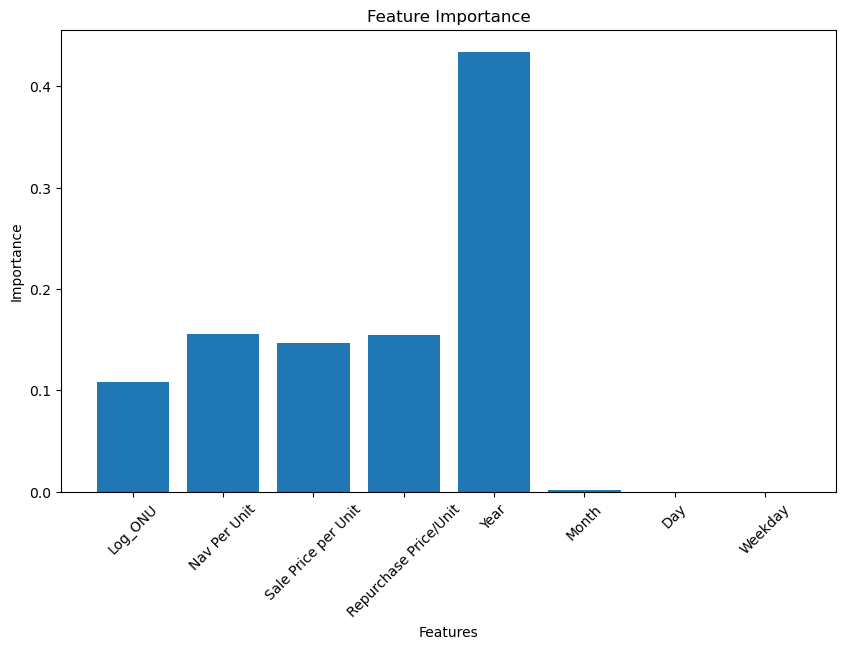

In [9]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming 'nav' is your DataFrame with a 'Date Valued' column
nav['Year'] = nav['Date Valued'].dt.year
nav['Month'] = nav['Date Valued'].dt.month
nav['Day'] = nav['Date Valued'].dt.day
nav['Weekday'] = nav['Date Valued'].dt.weekday

# Now, drop the original 'Date Valued' column as it's no longer needed as a feature
nav = nav.drop(columns=['Date Valued'])

# Define your features (X) and target (y)
X = nav.drop(columns=['Sqrt_NAV'])
y = nav['Sqrt_NAV']

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [10]:
nav.to_csv('NAV Watoto Fund.csv', index=False)

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
# X should be a DataFrame with multiple columns, not a Series
X = nav[['Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit', 'Year']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Calculate accuracy metrics for Gradient Boosting
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_r2 = r2_score(y_test, gb_predictions)

# Train and evaluate Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy metrics for Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

# Return accuracy metrics for Gradient Boosting and Random Forest
accuracy_metrics = {
    'Gradient Boosting MAE': gb_mae,
    'Gradient Boosting RMSE': gb_rmse,
    'Gradient Boosting R^2': gb_r2,
    'Random Forest MAE': rf_mae,
    'Random Forest RMSE': rf_rmse,
    'Random Forest R^2': rf_r2,
}

accuracy_metrics


{'Gradient Boosting MAE': 99.6946033455627,
 'Gradient Boosting RMSE': 186.7754623023268,
 'Gradient Boosting R^2': 0.9993402204854086,
 'Random Forest MAE': 30.672595486577542,
 'Random Forest RMSE': 80.91404983718719,
 'Random Forest R^2': 0.999876175362783}

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=1000, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=1000, max_depth=1000, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=1000, max_depth=1000),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'XGBoost Regressor': XGBRegressor(n_estimators=1000, max_depth=1000)
}

# Create a results dictionary to store model evaluation metrics
results = {
    'Model Name': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R^2': []
}

# Iterate through the models and evaluate their performance
for name, model in models.items():
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    results['Model Name'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R^2'].append(f'{r2 * 100:.4f}%')

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)


          Model Name         MAE            MSE        RMSE       R^2
0  Linear Regression  526.438298  331360.802899  575.639473  99.3733%
1      Decision Tree   45.528889   57207.623681  239.181152  99.8918%
2      Random Forest   33.704640   16407.323659  128.091076  99.9690%
3  Gradient Boosting   35.176049   29808.094021  172.650207  99.9436%
4      KNN Regressor  142.888732  117358.692663  342.576550  99.7780%
5  XGBoost Regressor   60.397761   69584.356945  263.788470  99.8684%


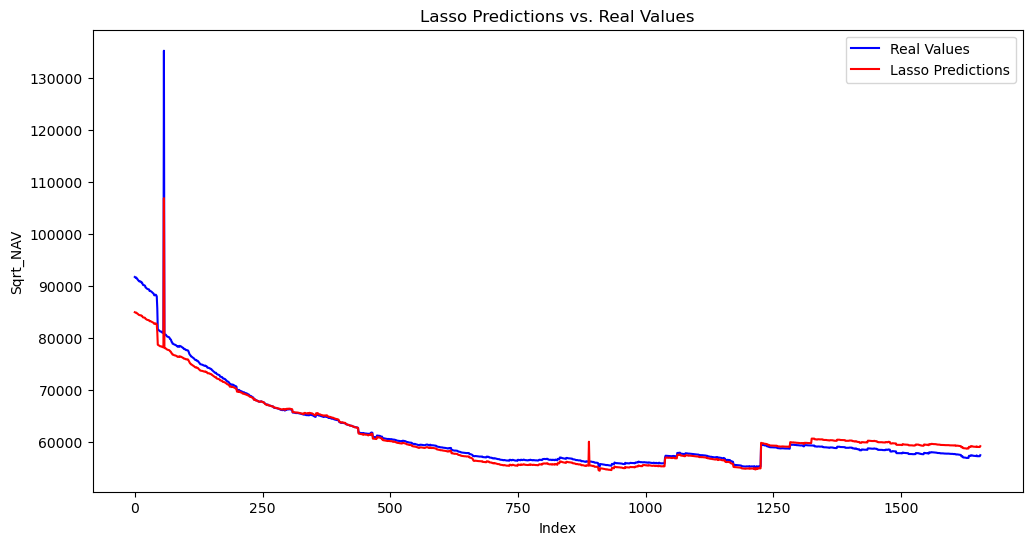

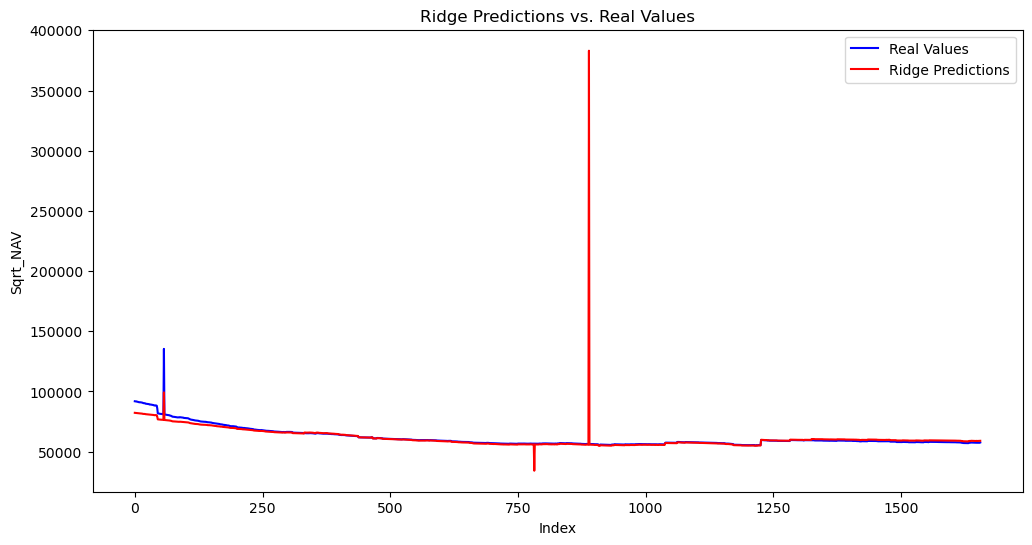

Lasso Results:
       Real Values  Lasso Predictions
0     91798.312066       85019.852820
1     91714.161600       84963.017064
2     91658.824933       84928.487390
3     91692.978270       84943.791651
4     91479.476690       84809.990669
...            ...                ...
1651  57316.991871       59100.162912
1652  57340.025104       59118.042010
1653  57326.818399       59104.994035
1654  57324.550109       59096.825906
1655  57525.313469       59257.516766

[1656 rows x 2 columns]

Ridge Results:
       Real Values  Ridge Predictions
0     91798.312066       82182.426461
1     91714.161600       82132.125106
2     91658.824933       82101.924993
3     91692.978270       82114.491979
4     91479.476690       81997.412350
...            ...                ...
1651  57316.991871       58772.217794
1652  57340.025104       58790.271468
1653  57326.818399       58777.512979
1654  57324.550109       58769.423008
1655  57525.313469       58931.805604

[1656 rows x 2 columns]


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Lasso and Ridge regression models
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter as needed
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed

# Perform cross-validation and make predictions for Lasso and Ridge
lasso_predictions = cross_val_predict(lasso_model, X, y, cv=5)
ridge_predictions = cross_val_predict(ridge_model, X, y, cv=5)

# Create line plots with real values as blue lines and predicted values as red lines for Lasso
plt.figure(figsize=(12, 6))
plt.plot(y, color='blue', label='Real Values')
plt.plot(lasso_predictions, color='red', label='Lasso Predictions')
plt.xlabel('Index')
plt.ylabel('Sqrt_NAV')
plt.title('Lasso Predictions vs. Real Values')
plt.legend()
plt.show()

# Create line plots with real values as blue lines and predicted values as red lines for Ridge
plt.figure(figsize=(12, 6))
plt.plot(y, color='blue', label='Real Values')
plt.plot(ridge_predictions, color='red', label='Ridge Predictions')
plt.xlabel('Index')
plt.ylabel('Sqrt_NAV')
plt.title('Ridge Predictions vs. Real Values')
plt.legend()
plt.show()

# Create a DataFrame to store real values and predicted values for Lasso
lasso_results_df = pd.DataFrame({'Real Values': y, 'Lasso Predictions': lasso_predictions})

# Create a DataFrame to store real values and predicted values for Ridge
ridge_results_df = pd.DataFrame({'Real Values': y, 'Ridge Predictions': ridge_predictions})

# Display the results DataFrames
print("Lasso Results:")
print(lasso_results_df)

print("\nRidge Results:")
print(ridge_results_df)

Model Evaluation Metrics:
          Model Name         MAE            MSE        RMSE       R^2
0  Linear Regression  526.438298  331360.802899  575.639473  99.3733%
1      Decision Tree   45.528889   57207.623681  239.181152  99.8918%
2      Random Forest   33.704640   16407.323659  128.091076  99.9690%
3  Gradient Boosting   34.679523   18482.738358  135.951235  99.9650%
4      KNN Regressor  142.888732  117358.692663  342.576550  99.7780%
5  XGBoost Regressor   60.397761   69584.356945  263.788470  99.8684%


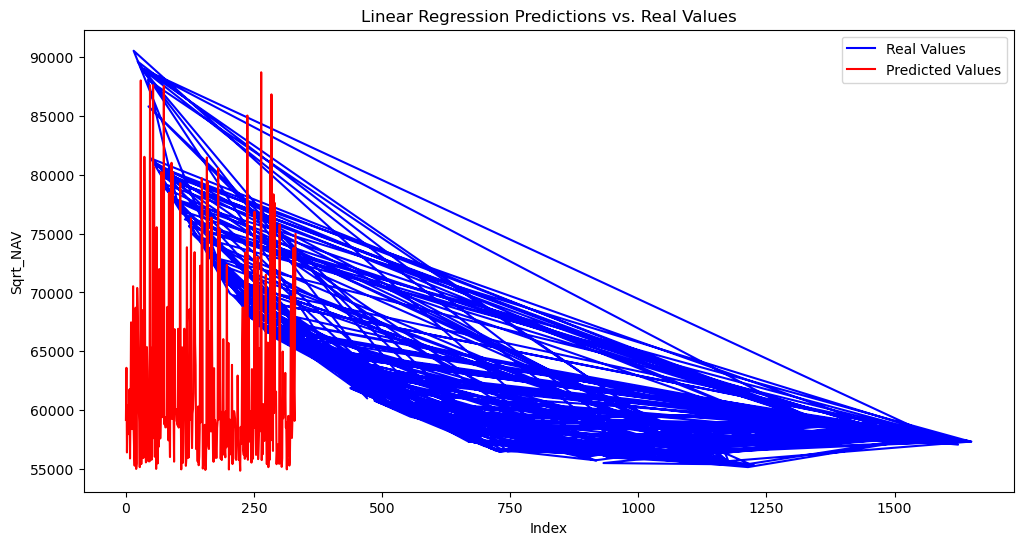

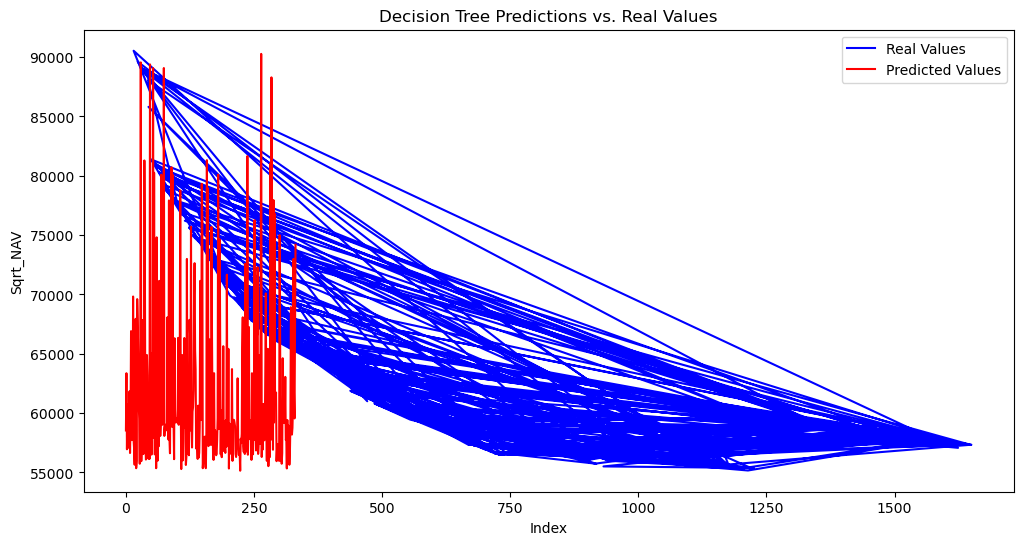

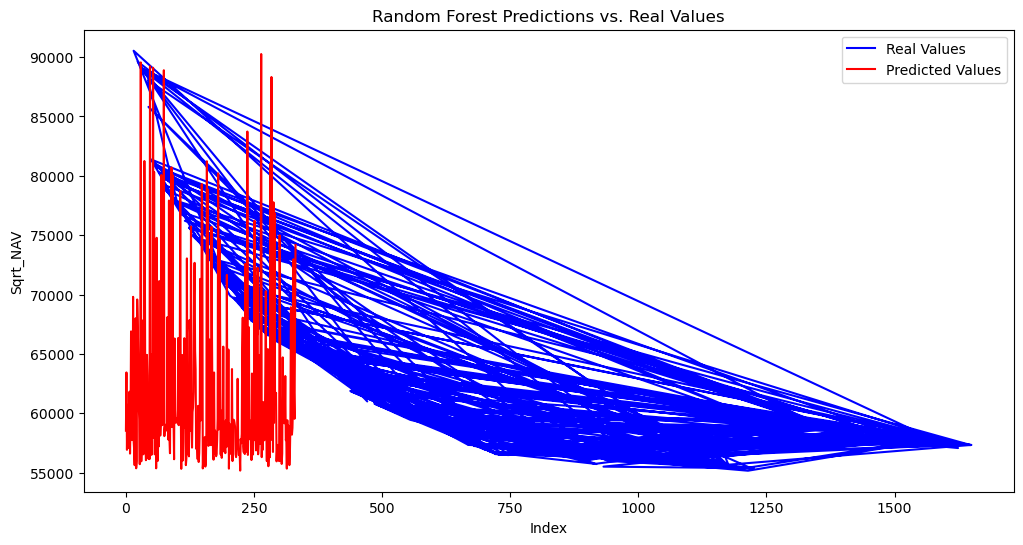

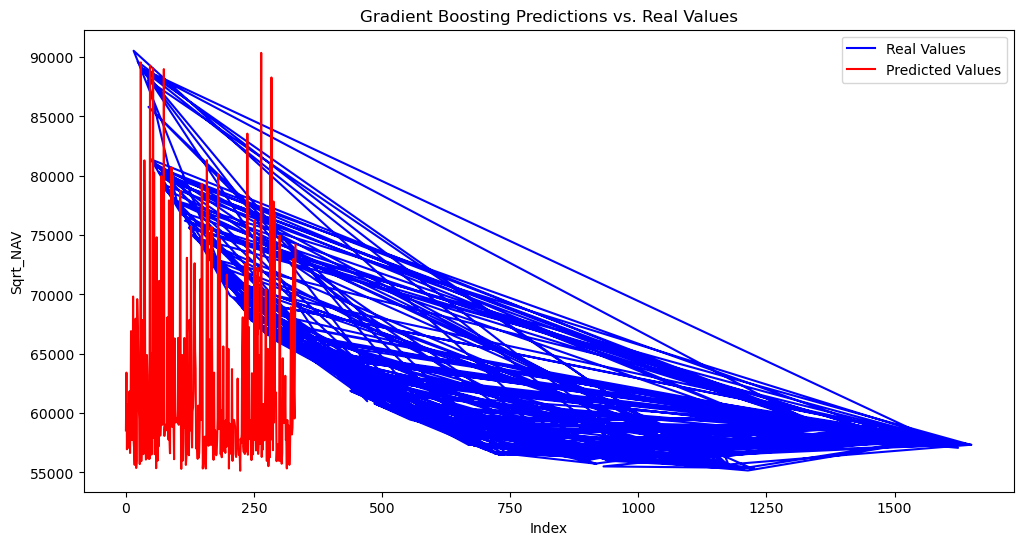

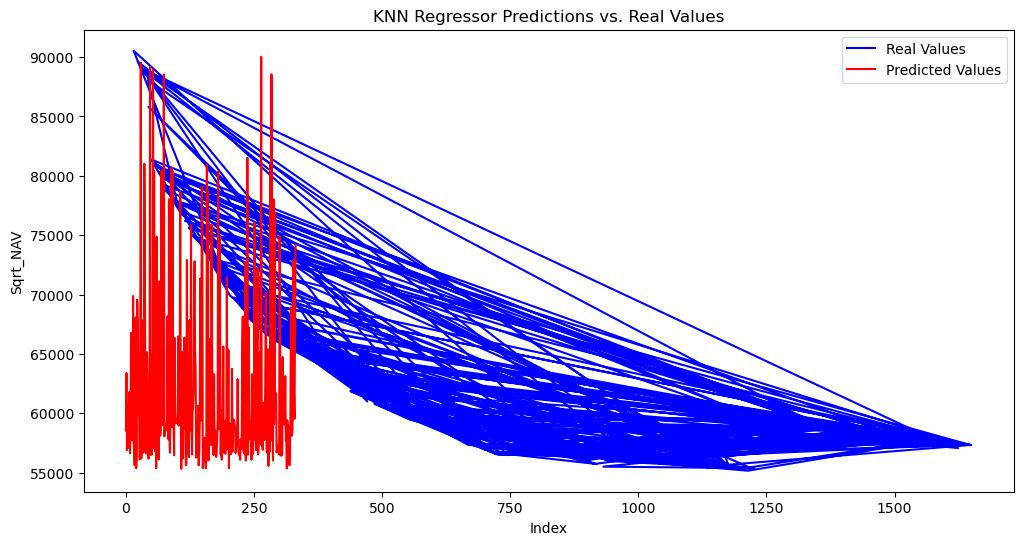

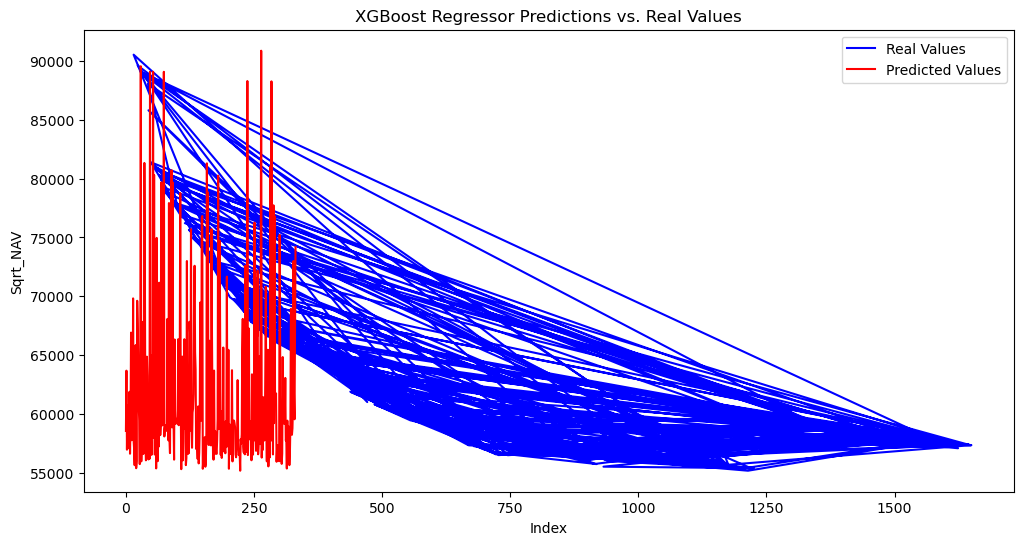

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=1000, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=1000, max_depth=1000, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=1000, max_depth=1000),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'XGBoost Regressor': XGBRegressor(n_estimators=1000, max_depth=1000)
}

# Create a results dictionary to store model evaluation metrics
results = {
    'Model Name': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R^2': []
}

# Create a dictionary to store real values and predicted values for each model
model_predictions = {}

# Iterate through the models and evaluate their performance
for name, model in models.items():
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    results['Model Name'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R^2'].append(f'{r2 * 100:.4f}%')

    # Store real values and predicted values in the dictionary
    model_predictions[name] = {'Real Values': y_test, 'Predicted Values': predictions}

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print("Model Evaluation Metrics:")
print(results_df)

# Create line plots with real values as blue lines and predicted values as red lines for each model
for name, predictions in model_predictions.items():
    plt.figure(figsize=(12, 6))
    plt.plot(predictions['Real Values'], color='blue', label='Real Values')
    plt.plot(predictions['Predicted Values'], color='red', label='Predicted Values')
    plt.xlabel('Index')
    plt.ylabel('Sqrt_NAV')
    plt.title(f'{name} Predictions vs. Real Values')
    plt.legend()
    plt.show()

Cross-Validation Model Evaluation Metrics:
          Model Name          MAE           MSE          RMSE         R^2
0  Linear Regression  1219.611905  1.314946e+08  11467.109701  -117.6589%
1      Decision Tree  2709.869351  3.351111e+07   5788.878352    44.5301%
2      Random Forest  2679.134945  3.331053e+07   5771.527831    44.8621%
3  Gradient Boosting  2663.878169  3.323666e+07   5765.124750    44.9844%
4      KNN Regressor  2843.559234  3.394022e+07   5825.823394    43.8198%
5  XGBoost Regressor  2660.208940  3.340535e+07   5779.736125    44.7052%


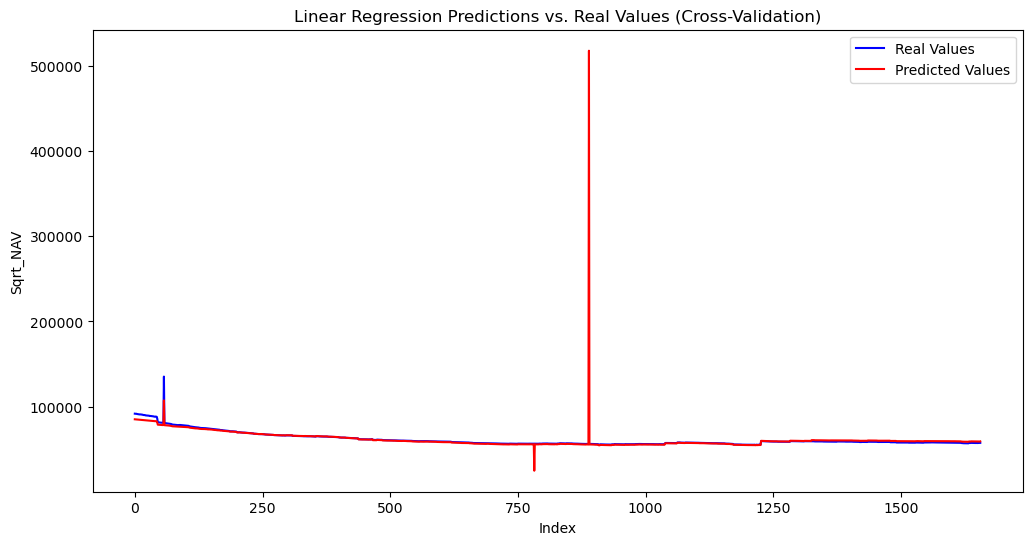

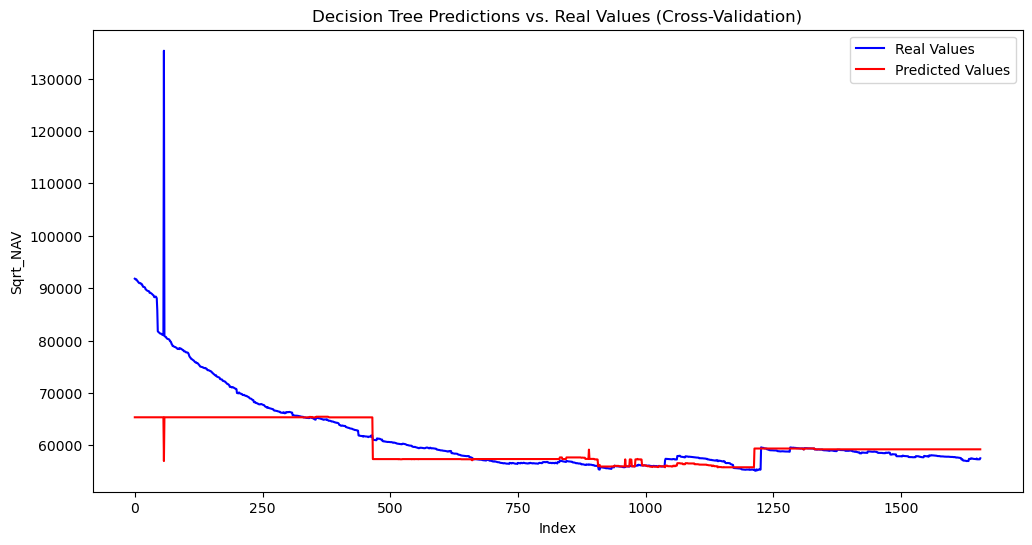

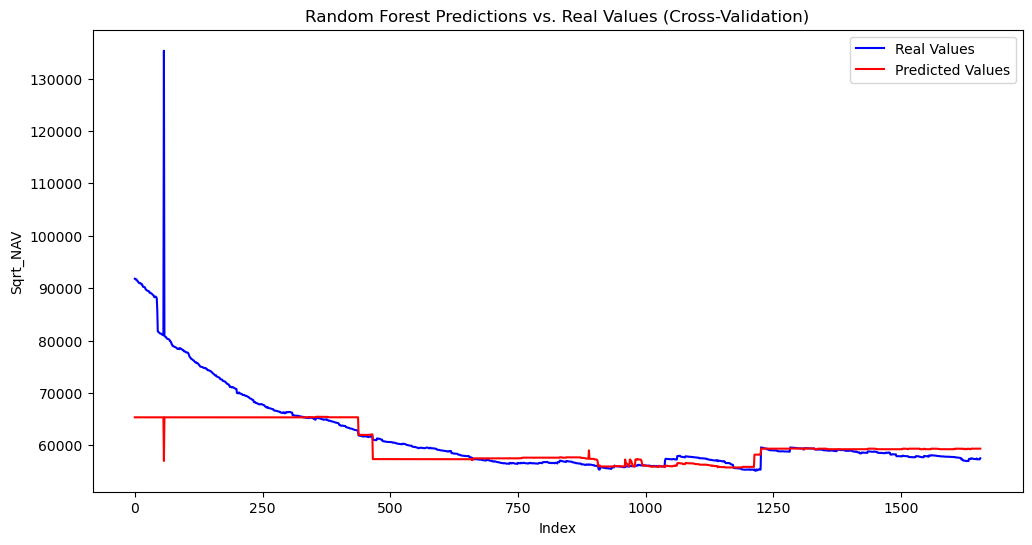

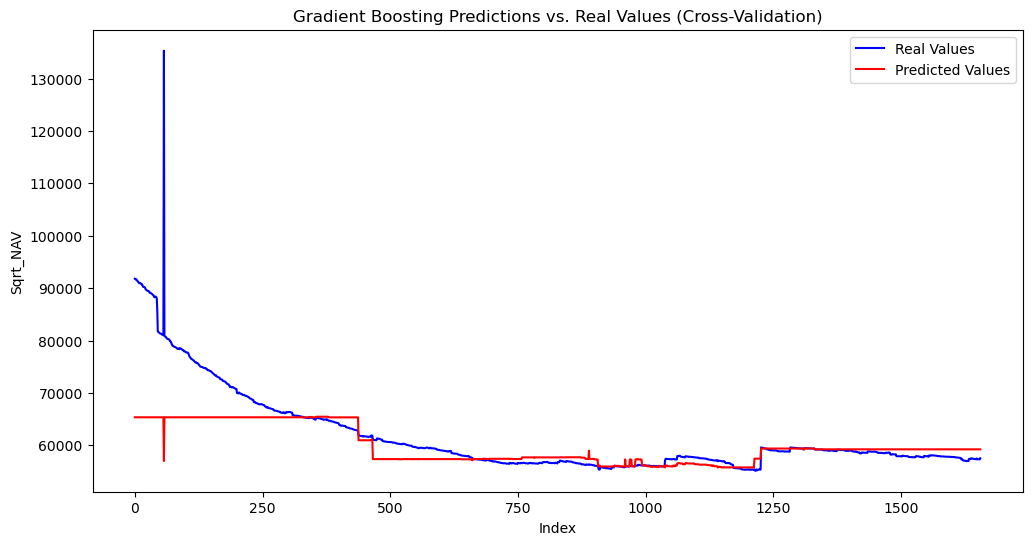

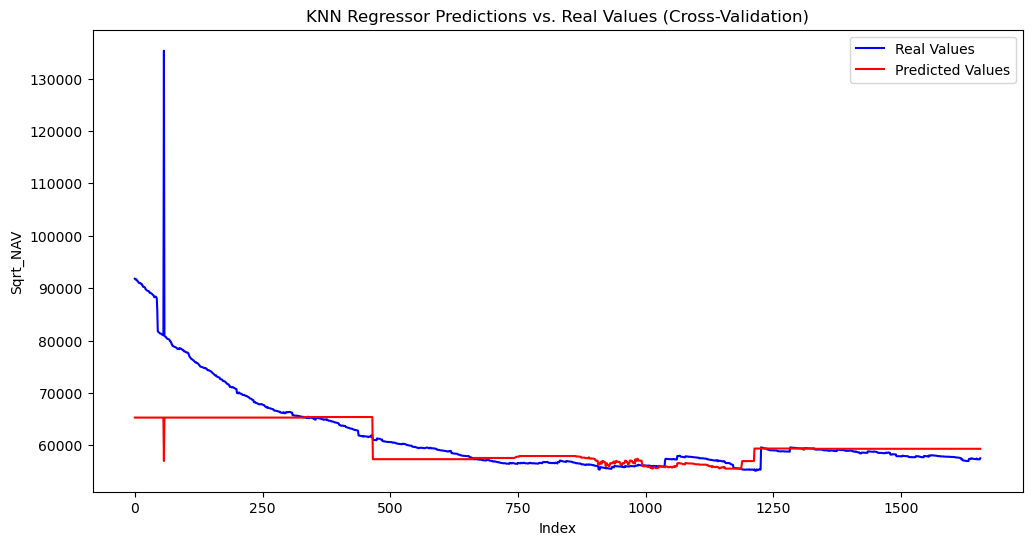

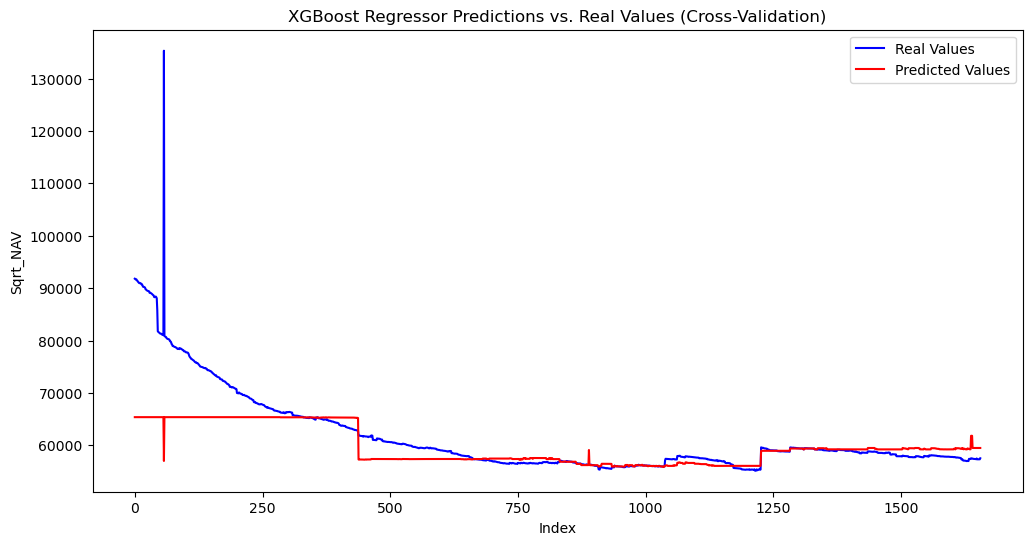

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=1000, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=1000, max_depth=1000, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=1000, max_depth=1000),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'XGBoost Regressor': XGBRegressor(n_estimators=1000, max_depth=1000)
}

# Create a results dictionary to store model evaluation metrics
results = {
    'Model Name': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R^2': []
}

# Create a dictionary to store real values and predicted values for each model
model_predictions = {}

# Iterate through the models and evaluate their performance using cross-validation
for name, model in models.items():
    # Perform cross-validation to get predictions
    predictions = cross_val_predict(model, X, y, cv=5)

    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r2 = r2_score(y, predictions)

    results['Model Name'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R^2'].append(f'{r2 * 100:.4f}%')

    # Store real values and predicted values in the dictionary
    model_predictions[name] = {'Real Values': y, 'Predicted Values': predictions}

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print("Cross-Validation Model Evaluation Metrics:")
print(results_df)

# Create line plots with real values as blue lines and predicted values as red lines for each model
for name, predictions in model_predictions.items():
    plt.figure(figsize=(12, 6))
    plt.plot(predictions['Real Values'], color='blue', label='Real Values')
    plt.plot(predictions['Predicted Values'], color='red', label='Predicted Values')
    plt.xlabel('Index')
    plt.ylabel('Sqrt_NAV')
    plt.title(f'{name} Predictions vs. Real Values (Cross-Validation)')
    plt.legend()
    plt.show()

## Hyper parameter tuning

Best Lasso Alpha: 0.001
Best Ridge Alpha: 10.0


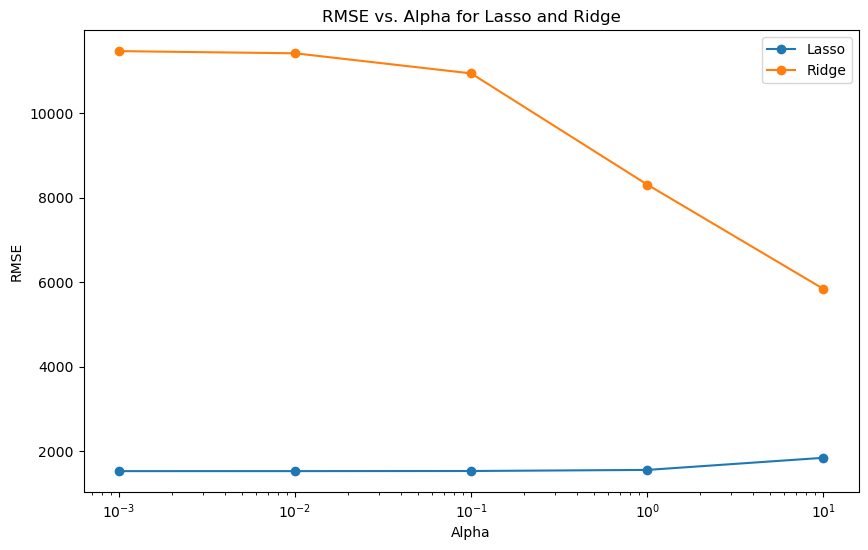

Lasso RMSE on Test Data: 576.0255977438445
Ridge RMSE on Test Data: 998.4552159160651


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of alpha values to search through
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]  # You can adjust this range as needed

# Initialize lists to store results
lasso_rmse_scores = []
ridge_rmse_scores = []

# Iterate through alpha values and perform hyperparameter tuning
for alpha in alphas:
    # Create Lasso and Ridge regression models with the current alpha
    lasso_model = Lasso(alpha=alpha)
    ridge_model = Ridge(alpha=alpha)
    
    # Perform cross-validation and calculate RMSE for Lasso and Ridge
    lasso_predictions = cross_val_predict(lasso_model, X, y, cv=5)
    ridge_predictions = cross_val_predict(ridge_model, X, y, cv=5)
    
    # Calculate RMSE for each model
    lasso_rmse = np.sqrt(mean_squared_error(y, lasso_predictions))
    ridge_rmse = np.sqrt(mean_squared_error(y, ridge_predictions))
    
    # Append RMSE scores to the respective lists
    lasso_rmse_scores.append(lasso_rmse)
    ridge_rmse_scores.append(ridge_rmse)

# Find the best alpha value for each model
best_lasso_alpha = alphas[np.argmin(lasso_rmse_scores)]
best_ridge_alpha = alphas[np.argmin(ridge_rmse_scores)]

print("Best Lasso Alpha:", best_lasso_alpha)
print("Best Ridge Alpha:", best_ridge_alpha)

# Plot RMSE scores for Lasso and Ridge across different alpha values
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_rmse_scores, marker='o', label='Lasso')
plt.plot(alphas, ridge_rmse_scores, marker='o', label='Ridge')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs. Alpha for Lasso and Ridge')
plt.xscale('log')  # Since alpha values are typically on a logarithmic scale
plt.legend()
plt.show()

# Once you have the best alpha values, you can train the final models with these values
best_lasso_model = Lasso(alpha=best_lasso_alpha)
best_ridge_model = Ridge(alpha=best_ridge_alpha)

best_lasso_model.fit(X_train, y_train)
best_ridge_model.fit(X_train, y_train)

# Make predictions using the best models
lasso_predictions = best_lasso_model.predict(X_test)
ridge_predictions = best_ridge_model.predict(X_test)

# Evaluate the best models on the test set (you can calculate RMSE, MAE, R^2, etc.)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))

print("Lasso RMSE on Test Data:", lasso_rmse)
print("Ridge RMSE on Test Data:", ridge_rmse)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Lasso and Ridge regression models with the best alpha values
best_lasso_alpha = 0.01  # Replace with the best alpha you found
best_ridge_alpha = 0.1  # Replace with the best alpha you found

lasso_model = Lasso(alpha=best_lasso_alpha)
ridge_model = Ridge(alpha=best_ridge_alpha)

# Create a list of tuples containing model names and their corresponding models
models = [('Lasso', lasso_model), ('Ridge', ridge_model)]

# Create a VotingRegressor as the ensemble model
ensemble_model = VotingRegressor(models)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)

# Evaluate the ensemble model on the test set
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))

print("Ensemble RMSE on Test Data:", ensemble_rmse)

Ensemble RMSE on Test Data: 572.7872267354551


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import VotingRegressor
import matplotlib.pyplot as plt

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Lasso and Ridge regression models with the best alpha values
best_lasso_alpha = 0.01  # Replace with the best alpha you found
best_ridge_alpha = 0.1  # Replace with the best alpha you found

lasso_model = Lasso(alpha=best_lasso_alpha)
ridge_model = Ridge(alpha=best_ridge_alpha)

# Create a list of tuples containing model names and their corresponding models
models = [('Lasso', lasso_model), ('Ridge', ridge_model)]

# Create a VotingRegressor as the ensemble model
ensemble_model = VotingRegressor(models)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)

# Calculate the metrics
mae = mean_absolute_error(y_test, ensemble_predictions)
mse = mean_squared_error(y_test, ensemble_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ensemble_predictions)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - ensemble_predictions) / y_test)) * 100

# Calculate Theil's U
theil_u = np.sqrt(np.mean(((y_test - ensemble_predictions) ** 2) / (y_test ** 2)))

# Calculate daily returns
daily_returns = y_test.pct_change().dropna()

# Calculate annualized returns
def calculate_annualized_returns(returns):
    total_return = np.prod(1 + returns) - 1
    num_years = len(returns) / 252  # Assuming 252 trading days in a year
    annualized_return = (1 + total_return) ** (1 / num_years) - 1
    return annualized_return

annualized_returns = calculate_annualized_returns(daily_returns)

# Calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    risk_free_rate = 0.03  # Replace with the appropriate risk-free rate
    excess_returns = returns - risk_free_rate
    mean_excess_return = np.mean(excess_returns)
    std_excess_return = np.std(excess_returns)
    sharpe_ratio = mean_excess_return / std_excess_return
    return sharpe_ratio

sharpe_ratio = calculate_sharpe_ratio(daily_returns)

# Create a summary table
metrics_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared', 'MAPE', "Theil's U", 'Annualized Returns', 'Sharpe Ratio'],
    'Value': [mae, mse, rmse ,r2, mape, theil_u, annualized_returns, sharpe_ratio],
    'Interpretation': ['Lower is better', 'Lower is better', 'Lower is better', 'Closer to 1 is better',
                       'Lower is better', 'Lower is better', 'Positive values are better', 'Higher is better']
}

metrics_df = pd.DataFrame(metrics_dict)

# Print the summary table
print(metrics_df)

               Metric          Value              Interpretation
0                 MAE     522.977837             Lower is better
1                 MSE  328085.207111             Lower is better
2                RMSE     572.787227             Lower is better
3           R-squared       0.993795       Closer to 1 is better
4                MAPE       0.845997             Lower is better
5           Theil's U       0.009087             Lower is better
6  Annualized Returns       0.197444  Positive values are better
7        Sharpe Ratio      -0.110401            Higher is better


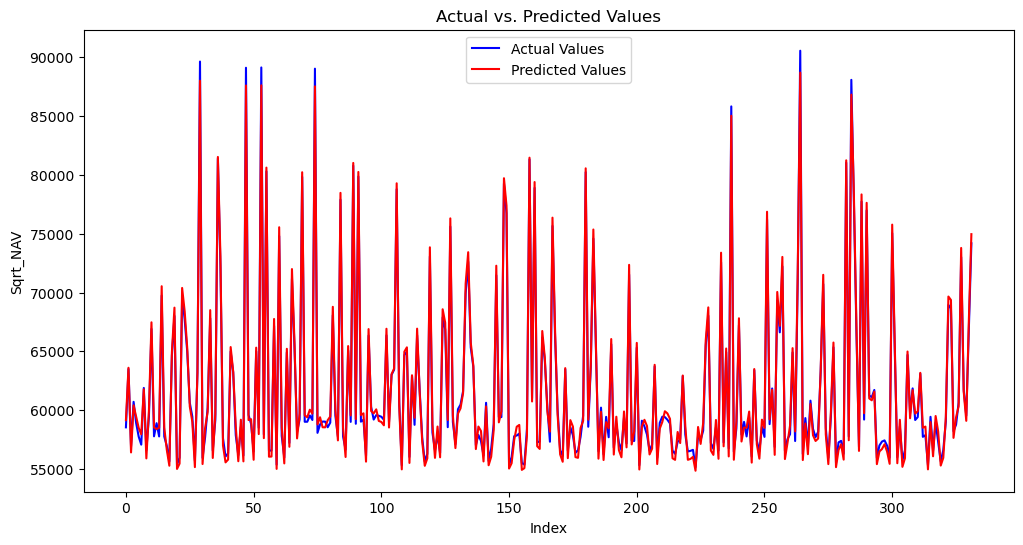

In [19]:
# Create a line plot to visualize the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, color='blue', label='Actual Values')
plt.plot(ensemble_predictions, color='red', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Sqrt_NAV')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()